'''
sound data에 대해 알아보자
sinusoidal - 사인함수처럼 그려지는 것
phasor - sinusoidal을 만들어냄.

0도에서 360도가          <-degree
0~ 2파이에 대응됨        <-radian

파이=180도

sin() 괄호안에는  라디안 값이 들어가야 함!!!! 중요!!!

f(theta) = e^theta*i  = a+bi
e는 자연상수, i는 허수(-1에 루트씌운것)
즉, theta가 변하면 아웃값도 변함

theta = 0, 파이/2, 파이, 파이*3/2, 파이*2
f(파이/2) = 코사인=0, 사인은 1
f(파이)   = 코사인은 -1, 사인은 0

f(theta) = a+bi라고 할 때 theta값을 0, 파이/2, 파이, 파이*3/2,
복소평면 (cimplex plain)에 표시하면 
a값을 x축, b값을 y축에 집어넣고 찍으면 동그랗게 그려짐 (1,0),(0,-1),(-1,0),(0,1)에 찍힘
즉, 벡터값으로 모두 표현됨
오일러 공식 참고
'''

sin wave에는 시간개념이 없음. 소리는 그안에 시간의 개념이 있어야 함.

In [70]:
#phasor

from matplotlib import pyplot as plt     #    = import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np                     #numpy libarary를 import한 것
%matplotlib notebook
from scipy.signal import lfilter

In [4]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz   음질의 해상도를 의미. 1초를 10000개로 나눔
dur = 0.5        # in seconds
freq = 500.0     # sine frequency, Hz 100hz 남자목소리 같은

'''
t = 0.0001 0.0002 0.0003~ 이런식이면 10000개 들어감
0.5000 만드는 것이 목표
'''

In [5]:
#따라서
t = np.arange(1,sr*dur+1)/sr
t #만분의 일초부터 만분의 오천초까지 만듦.

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [6]:
#1*1/10^4

In [7]:
# generate phase
theta = t * 2*np.pi * freq
    #시간*2파이*프리퀀시  => 초당 몇바퀴를도는지 frequncy를 곱해줌

In [8]:
# generate signal by cosine-phasor
s= np.sin(theta)
s

array([ 6.27905195e-02,  1.25333234e-01,  1.87381315e-01, ...,
       -1.25333234e-01, -6.27905195e-02,  1.96438672e-15])

Text(0, 0.5, 'real')

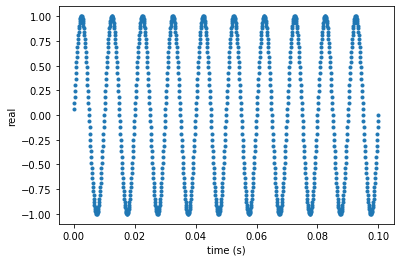

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [10]:
#11월 7일

In [30]:
#각도만들기
theta = np.arange(0,2*np.pi,0.1)   #0부터 2파이까지의 각도를 만듦.  파이값이 증가하면 그래프가 그려지는 횟수도 증가. 2파이당 한바퀴

In [31]:
theta       #0부터 약 6.28까지 1씩 증가히므로

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [53]:
s = np.sin(theta)          #numpy에 들어있는 사임함수를 사용한 것. 사인함수에는 라디안 값을 0부터 6까지 총 7개 넣어주었음.
s                       #theta값의 변화에 따른 사인함수 결과값

array([ 6.27905195e-02,  1.25333234e-01,  1.87381315e-01, ...,
       -1.25333234e-01, -6.27905195e-02,  1.96438672e-15])

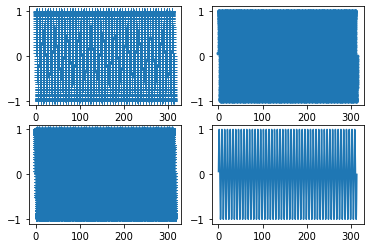

In [54]:
#plot하기
fig = plt.figure()
ax = fig.add_subplot(221)   #2*2로 화면 분리 후 첫 번째
ax.plot(theta, s, '+')      # +로 점찍기
ax = fig.add_subplot(222)   #2*2로 화면 분리 후 두 번째
ax.plot(theta, s, '.')       #.으로 점찍기
ax = fig.add_subplot(223)   #2*2로 화면 분리 후 세 번째
ax.plot(theta, s, '*')       #*로 점찍기
ax = fig.add_subplot(224)   #2*2로 화면 분리 후 네 번째
ax.plot(theta, s, '-')       #라인으로 연결하기


#축 0,1,2,3,4,5,6까지 값이 찍혀있음


Text(0, 0.5, 'value')

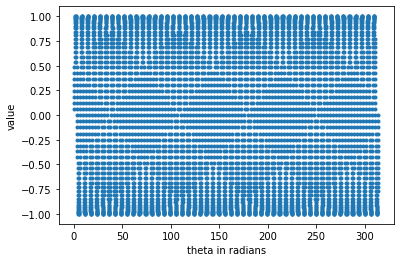

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(theta, s,'.')           #디폴트값은 라인임 '-'
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [56]:
#x축의 증가량과 y축의 증가량이 비례하다면 linear함. 즉, 그래프가 직선으로 그려잠 (y=ax+b 형태의 그래프)
#나머지는 모두 non linear

In [57]:
#시간만들기
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz   음질의 해상도를 의미. 1초를 10000개로 나눔
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz 100hz 남자목소리 같은

In [58]:
#시간만들기
t= np.arange(1,sr*dur+1)/sr 
               #1초를 샘플링레이트*소리길이, +1을 한 이유는 마지막꺼가 제외되기 때문.

In [59]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [60]:
#시간과 theta 합치기
#theta = t*2*np.pi   <-1초동안 한바퀴 돌기
theta = t * 2*np.pi * freq     #       <-frquency까지 더해주기 (?)

In [61]:
theta

array([6.28318531e-02, 1.25663706e-01, 1.88495559e-01, ...,
       3.14033602e+02, 3.14096434e+02, 3.14159265e+02])

Text(0, 0.5, 'real')

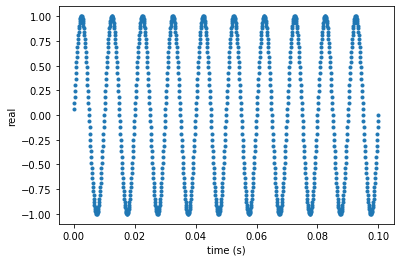

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')          #t는 시간, s는 각도
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [64]:
c = np.exp(theta*1j)   #theta값만 변함 , j = i = 마이너스 루트1
c

#                           e-01 은 10분의 1, e-02는 100분의 1
#즉, 모든 숫자는 a+bi의 형태임

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

In [66]:
len(c)

5000

<IPython.core.display.Javascript object>


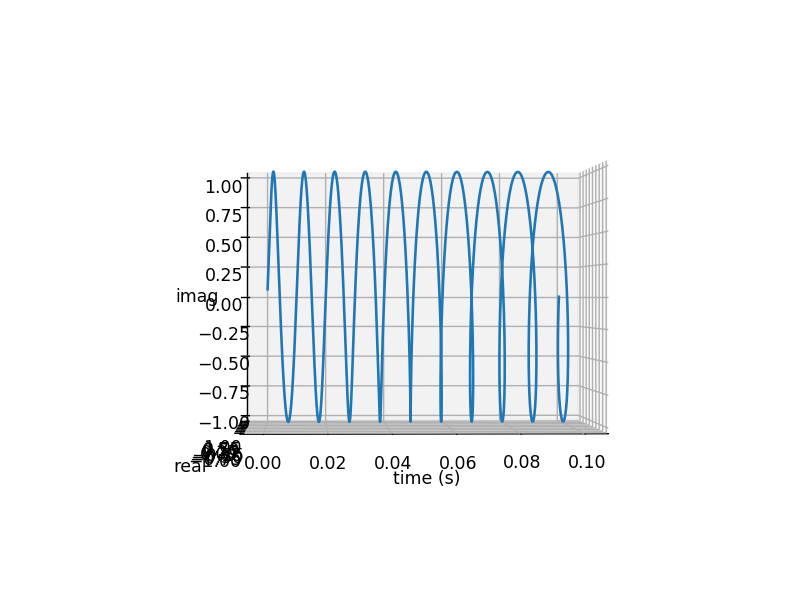

Text(0.5, 0, 'imag')

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-')   #3차원이니까 3개의 입력 한 점당 3요소를 가짐(a,b,c)
#       시간,     c(=a+bi)값의 a부분,    c값의 b부분 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
#코사인은 real, 사인은 imaginary와 관련되어있음

In [ ]:
#위에서 봤을 때 imag축 무시하고 보면 코사인그래프가 그려짐. (1,0)에서 시작
#옆에서 봤을 때 real축 무시하고 보면 사인그래프가 그려짐 (0,0)에서 시작

In [72]:
ipd.Audio(s,rate=sr)   #오디오 실행하는 라이브러리